# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.

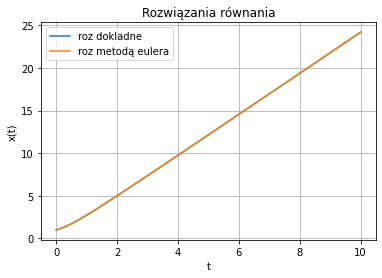

In [1]:
import numpy as np
from main import solve_euler
import matplotlib.pyplot as plt


def fun(t,y):
    return (y+t)/(y-t)

y0 = 1
t_span = np.linspace(0, 10, 10000)

roz_eu = solve_euler(fun, t_span, y0)
roz_dok = lambda t: t + np.sqrt(1 + 2 * t**2)


plt.plot(t_span, roz_dok(t_span), label = "roz dokladne")
plt.plot(t_span, roz_eu, label = "roz metodą eulera")
plt.title("Rozwiązania równania")
plt.legend()
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

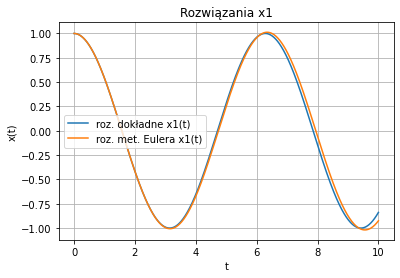

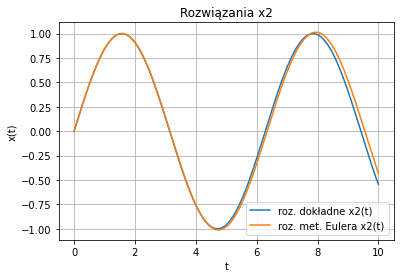

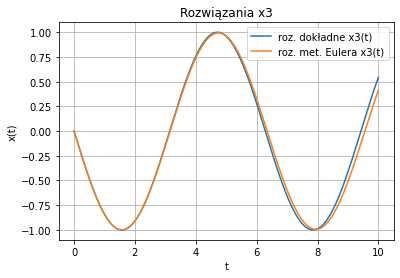

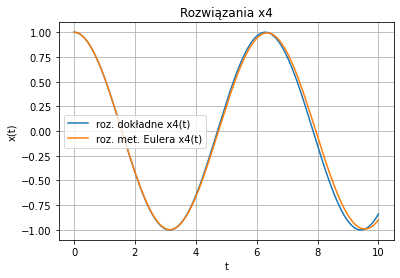

In [2]:
def fun(t, y):
    yr1 = y[2]
    yr2 = y[3]
    yr3 = -y[0] / ((y[0]**2 + y[1]**2)**(3/2))
    yr4 = -y[1] / ((y[0]**2 + y[1]**2)**(3/2))

    return np.array([yr1, yr2, yr3, yr4])

y0 = np.array([1, 0, 0, 1])

#roz_dok = lambda t: np.cos(t), lambda t: np.sin(t), lambda t: -np.sin(t), lambda t: np.cos(t)
roz_eu = solve_euler(fun, t_span, y0)


plt.plot(t_span, np.cos(t_span), label = "roz. dokładne x1(t)")
plt.plot(t_span, roz_eu[:,0], label = "roz. met. Eulera x1(t)" )
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x1")
plt.grid()
plt.show()

plt.plot(t_span, np.sin(t_span), label = "roz. dokładne x2(t)")
plt.plot(t_span, roz_eu[:,1], label = "roz. met. Eulera x2(t)" )
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x2")
plt.grid()
plt.show()

plt.plot(t_span, -np.sin(t_span), label = "roz. dokładne x3(t)")
plt.plot(t_span, roz_eu[:,2], label = "roz. met. Eulera x3(t)" )
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x3")
plt.grid()
plt.show()

plt.plot(t_span, np.cos(t_span), label = "roz. dokładne x4(t)")
plt.plot(t_span, roz_eu[:,3], label = "roz. met. Eulera x4(t)" )
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x4")
plt.grid()
plt.show()

Jak widać, wynik rozwiązania równania różniczkowego różni się od rozwiązania dokładnego. Można tą
różnicę zmiejszyć zmiejszając krok, czyli odstęp między kolejnymi wartościami wektora t_span - wtedy przybliżenie
będzie dokładniejsze.

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

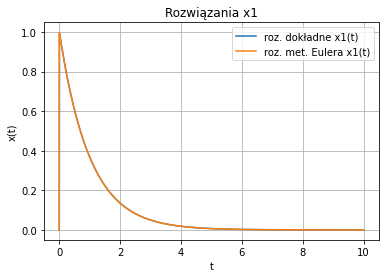

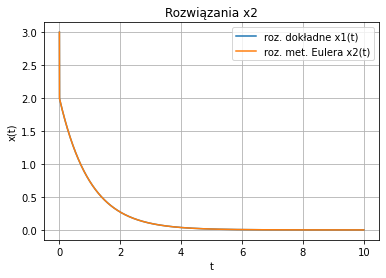

In [3]:
def fun(t, y):
    A = np.array([[-667, 333], [666, -334]])
    return A @ y

y0 = np.array([0,3])

t_span = np.linspace(0, 10, 10000)
roz_eu = solve_euler(fun, t_span, y0)

roz_dok1 = lambda t : np.e ** (-t) - np.e ** (-1000 * t)
roz_dok2 = lambda t : 2 * np.e ** (-t) + np.e ** (-1000 * t)

plt.plot(t_span, roz_dok1(t_span), label = "roz. dokładne x1(t)")
plt.plot(t_span, roz_eu[:,0], label = "roz. met. Eulera x1(t)" )
plt.legend()
plt.title("Rozwiązania x1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

plt.plot(t_span, roz_dok2(t_span), label = "roz. dokładne x1(t)")
plt.plot(t_span, roz_eu[:,1], label = "roz. met. Eulera x2(t)" )
plt.legend()
plt.title("Rozwiązania x2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

rozwiązaniem dokładnym tego układu jest:

x=c1 * e^(-t) * \begin{pmatrix}1\\ 2\end{pmatrix} + c2 * e^(-1000t) *
\begin{pmatrix}-1\\ 1\end{pmatrix}

Wynik ten można otrzymać stosując odpowiednie wzór na rozwiązanie układu: x(t)=e^(A(t−t0))x0
Macierz e^(A(t−t0)) otrzymujemy zaś korzystając z dekompozycji Jordana (czyli ponownie, zastosowując
odpowiednie wzory)

c1 oraz c2 to stałe, za które do rysowania wykresów przyjęłam 1

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

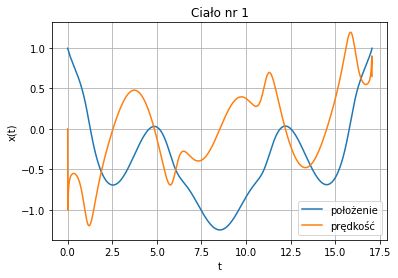

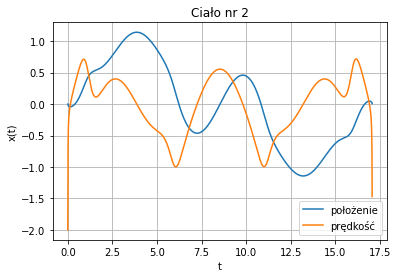

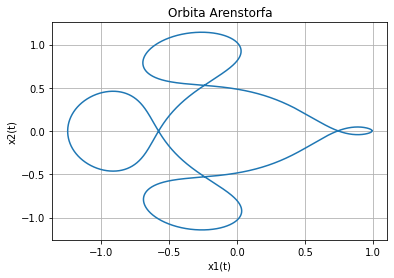

In [4]:
def fun(t, x):

    u = 0.012277471
    u2 = 1 - u

    D1 = ((x[0] + u)**2 + x[2]**2)**(3/2)
    D2 = ((x[0] - u2)**2 + x[2]**2)**(3/2)


    x1 = x[1]
    x2 = x[0] + 2 * x[3] - u2 * (x[0] + u) / D1 - u * (x[0] - u2) / D2
    x3 = x[3]
    x4 = x[2] - 2 * x[1] - u2 * x[2] / D1 -  u * x[2] / D2
    
    return np.array([x1, x2, x3, x4])

y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
T = 17.0652165601579625588917206249

t_span = np.linspace(0, T, 17065210 )

result = solve_euler(fun, t_span, y0)


plt.plot(t_span, result[:,0], label = "położenie")
plt.plot(t_span, result[:,1], label = "prędkość")
plt.legend()
plt.title("Ciało nr 1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

plt.plot(t_span, result[:,2], label = "położenie")
plt.plot(t_span, result[:,3], label = "prędkość")
plt.legend()
plt.title("Ciało nr 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()



plt.plot(result[:,0], result[:,2])
plt.title("Orbita Arenstorfa")
plt.xlabel("x1(t)")
plt.ylabel("x2(t)")
plt.grid()
plt.show()

Aby otrzymać dobre przybiżenia, które zachowało okresowość, należało przyjąć bardzo mały krok. Dla
większych odstępów otrzymane wyniki w niczym nie przypominały aktualnych rezultatów - wykresy prędkości
i przemieszczenia przypominały sinusoidę o wiecznie zwiększającej się amplitudzie, a wykres wzajemnych położeń
był niekończącą sie spiralą.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
